# Commit Happiness: Part III

*Authors*: Franco Bellomo, Adrian Price-Whelan, Madhura Killedar

Search Hackpad for links to GitHub repos, scrape commit messages, and analyse them

In [1]:
import getCommitMessages as gcm
import numpy as np
import textblob
from datetime import datetime
from pytz import timezone
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
textfile = "./github_links.txt"
repo_links = np.loadtxt(textfile,dtype="string")

In [24]:
commit_infos = []
for link in repo_links:
    messages, times = gcm.getCommitInfo(link)
    user_repo = link[19:]
    repo_data = (messages,times,user_repo)
    commit_infos.append(repo_data)
    #print len(messages)
    #print len(times)

In [30]:
all_commits = []
all_times = []
all_users = []
all_feelings = []
repos_feels = []

for repo_data in commit_infos:
    commits = repo_data[0]
    all_commits += commits
    all_times += repo_data[1]
    all_users.append([repo_data[2]]*)
    user_repo = repo_data[2]
    feelings = []
    
    for message in commits:
        feel = textblob.TextBlob(message).sentiment.polarity
        all_feelings.append(feel)
        if not message.startswith("Merge"):
             feelings.append(feel)

    average_feels = sum(feelings)/len(feelings)
    repos_feels.append(average_feels)
    #print "%s has average feelings = %f"%(user_repo,average_feels)


In [5]:
def get_position_of_max(dummy_list):
    m = max(dummy_list)
    all_positions = [i for i, j in enumerate(dummy_list) if j == m]
    return all_positions

def get_position_of_min(dummy_list):
    m = min(dummy_list)
    all_positions = [i for i, j in enumerate(dummy_list) if j == m]
    return all_positions

In [6]:
maxind = get_position_of_max(all_feelings)

    print "%s is the happiest. Their happiest commit is: \n %s"%(happy_user,happiest_commit)

patscott/pippi is the happiest. Their happiest commit is: 
 More parsing updates...


In [31]:
ind = get_position_of_max(all_feelings)[0]
commit = all_commits[ind]
user = all_users[ind]
print commit
print user


IndexError: list index out of range

In [16]:
all_happiest = get_position_of_min(repos_feels)

for happy in all_happiest:
    happy_repo_data = commit_infos[happy]
    happy_user = happy_repo_data[2]
    commits = happy_repo_data[0]
    happinesses = []
    
    for commit in commits:
        happinesses.append(textblob.TextBlob(commit).sentiment.polarity)
        
    which_happiest = get_position_of_max(happinesses)[0]
    happiest_commit = commits[which_happiest]
    happiest_time = happy_repo_data[1][which_happiest]
    print "%s is the happiest and has happiest commit: \n %s"%(happy_user,happiest_commit)

juramaga/clustering is the happiest and has happiest commit: 
 first commit


In [7]:
all_saddest = get_position_of_min(repos_feels)

for sad in all_saddest:
    sad_repo_data = commit_infos[sad]
    sad_user = sad_repo_data[2]
    commits = sad_repo_data[0]
    sadnesses = []
    
    for commit in commits:
        sadnesses.append(textblob.TextBlob(commit).sentiment.polarity)
        
    which_saddest = get_position_of_min(sadnesses)[0]
    saddest_commit = commits[which_saddest]
    saddest_time = sad_repo_data[1][which_saddest]
    
    print "%s is the saddest. Their saddest commit is: \n %s"%(sad_user,saddest_commit)

juramaga/clustering is the saddest. Their saddest commit is: 
 Adding Code for Confused Sources Gaussian Mixture


In [8]:
all_datetimes = []

for time in all_times:
    dt_obj = datetime.strptime(time, "%Y-%m-%dT%H:%M:%SZ")
    all_datetimes.append(dt_obj)

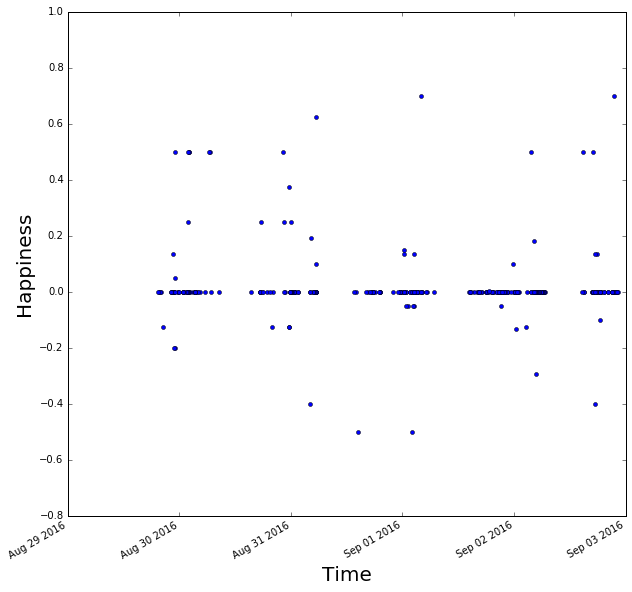

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
all_datenums = mpl.dates.date2num(all_datetimes)
ax.plot_date(all_datenums, all_feelings, ms=4)
ax.set_xlim([datetime(2016,8,29).toordinal(), datetime(2016,9,3).toordinal()])
ax.set_xlabel("Time",fontsize=20)
ax.set_ylabel("Happiness",fontsize=20)
plt.gcf().autofmt_xdate()

86400


(-1, 1)

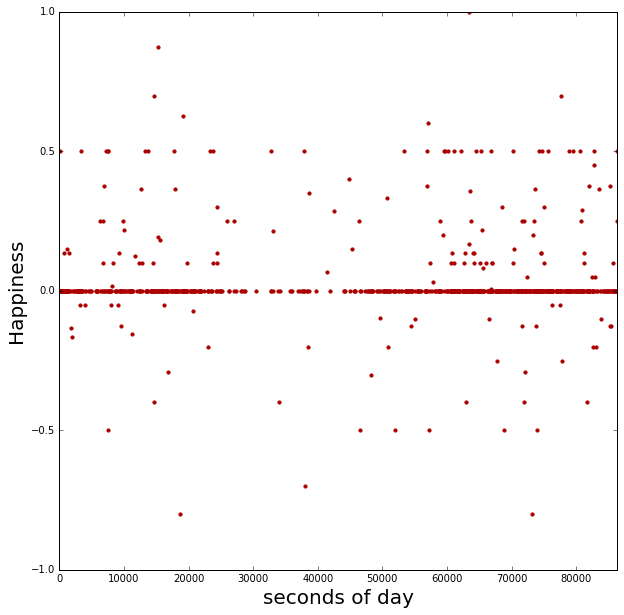

In [11]:
seconds_in_day = 3600*24
print seconds_in_day
#standard = timezone('US/Eastern').localize(datetime(2016,8,28))
#all_datesecs = [timezone('US/Eastern').localize(i) - standard for i in all_datetimes]
standard = datetime(2016,8,28)
all_datesecs = [i - standard for i in all_datetimes]
all_seconds = [i.total_seconds()%seconds_in_day for i in all_datesecs]
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(all_seconds, all_feelings, s=10, color="#AA0000")
ax2.set_xlabel("seconds of day",fontsize=20)
ax2.set_ylabel("Happiness",fontsize=20)
ax2.set_xlim([0,seconds_in_day])
ax2.set_ylim([-1,1])